<a href="https://colab.research.google.com/github/rakesh4real/swift4tensorflow/blob/master/Linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import TensorFlow

In [2]:
// visualisations
import Python

let plt = Python.import("matplotlib.pyplot")
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


**Create Dataset**

In [0]:
// -------------------------------------------------------
let num_data_points: Float = 100
let num_data_points_int: Int = Int(num_data_points)
let noise_mean = Tensor<Float>(0)
let noise_dev = Tensor<Float>(10)
let w0 = Tensor<Float>(3.0)
let w1 = Tensor<Float>(2.0)
// -------------------------------------------------------

let noise = Tensor<Float>(randomNormal: [num_data_points_int], mean: noise_mean, standardDeviation: noise_dev)

let X = Tensor<Float>(rangeFrom: 0, to: num_data_points, stride: 1) //[0, num_data_points)
let y = w1*X + w0 + noise // y = w1*x + w0 + E 

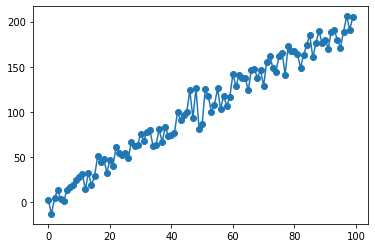

None


In [6]:
// plot
plt.close();
plt.plot(X.makeNumpyArray(), y.makeNumpyArray(), marker: "o")
plt.show();

**Shuffle**

In [0]:
let shuffled_indices = Array<Int>(0..<X.scalarCount).shuffled()

var shuffled_X = Tensor<Float>(zeros: [X.scalarCount]) // temporary
var shuffled_y = Tensor<Float>(zeros: [X.scalarCount]) // temporary

for i in 0..<X.scalarCount {
  shuffled_X[i] = X[shuffled_indices[i]]
  shuffled_y[i] = y[shuffled_indices[i]]
}

**Test - Train Split**

In [0]:
let split_ratio: Float = 0.8
let train_count_after_split = Int( Float(X.scalarCount) * split_ratio )

In [0]:
var train_count = train_count_after_split // Note

In [0]:
// split
var train_x = shuffled_X.slice(lowerBounds: [0], upperBounds: [train_count]) //[0, train_count)
var test_x = shuffled_X.slice(lowerBounds: [train_count], upperBounds: [shuffled_X.scalarCount])
var train_y = shuffled_y.slice(lowerBounds: [0], upperBounds: [train_count])
var test_y = shuffled_y.slice(lowerBounds: [train_count], upperBounds: [shuffled_X.scalarCount])
/*
print(train_x.scalarCount)
print(train_y.scalarCount)
print(test_x.scalarCount)
print(test_y.scalarCount)
*/

**Add Extra Bias (w0)**

In [0]:
// add bias to x_train for mx+'c'
// reshape both(ones & train_x) into col vector before concatenation
var ones_train = Tensor<Float>(ones: [train_count, 1])
var x_train_with_bias = train_x.reshaped(to: [train_count,1]).concatenated(with: ones_train, alongAxis: 1)

var ones_test = Tensor<Float>(ones: [(num_data_points_int - train_count), 1])
var x_test_with_bias = test_x.reshaped(to: [num_data_points_int - train_count, 1]).concatenated(with: ones_test, alongAxis: 1)

In [0]:
// add biases to train_x and test_x
train_x = x_train_with_bias
test_x = x_test_with_bias

// reshape to col vec
train_y = train_y.reshaped(to: [train_count, 1])
test_y = test_y.reshaped(to: [num_data_points_int - train_count, 1])

**Cost Function**

In [0]:
@differentiable
func cost(theta: Tensor<Float>, trues: Tensor<Float>) -> Tensor<Float>{
  var predicted = train_x • theta // Global: train_x
  var data_points = Float(predicted.scalarCount)
  var losses_tensor = (1/2) * pow(predicted - trues, 2) // ------> Tensor
  return ( 1/data_points ) * losses_tensor.sum() // -------> Scalar (Standardized. Minimize it)
}

In [14]:
var theta = Tensor<Float>(randomNormal: [2, 1])
print(theta)

[[-0.628048],
 [2.0439851]]


In [15]:
print( cost(theta: theta, trues: train_y) )

11848.8125


In [21]:
var grad = gradient(at: theta, train_y, in: cost).0 // Note: '0'
print(grad)

[[ -8945.413],
 [-134.23346]]


In [27]:
//print( cost(theta: theta, trues: train_y) )

for _ in 0...100{
  var grad = gradient(at: theta, train_y, in: cost).0
  theta = theta - grad * 0.0001
  print( cost(theta: theta, trues: train_y) )
}


5673.4478
2508.0613
1126.6139
523.7188
260.60135
145.77094
95.65631
73.78513
64.24001
60.074306
58.256264
57.46281
57.116497
56.96534
56.89934
56.87052
56.85792
56.852398
56.849964
56.848858
56.848366
56.84812
56.848
56.84791
56.84787
56.847816
56.847767
56.847717
56.847668
56.847633
56.847595
56.84756
56.8475
56.84746
56.847412
56.847378
56.84733
56.84729
56.847248
56.847206
56.847157
56.847126
56.847076
56.847034
56.846985
56.846935
56.846912
56.84685
56.84681
56.846767
56.84673
56.84668
56.846645
56.8466
56.846558
56.846497
56.846474
56.84643
56.846386
56.84634
56.84631
56.846252
56.84622
56.846172
56.84613
56.846096
56.84605
56.846004
56.845955
56.845905
56.845875
56.845825
56.845776
56.845753
56.8457
56.845654
56.84562
56.845577
56.84553
56.845478
56.845448
56.845398
56.845345
56.845318
56.845264
56.845226
56.84518
56.845154
56.845093
56.84505
56.845013
56.844982
56.84493
56.844887
56.84485
56.8448
56.844753
56.844715
56.844666
56.844635
56.84458


In [28]:
theta

[[2.0076783],
 [  2.09075]]


In [33]:
var preds = train_x • theta
preds  = preds.reshaped(to: [80])
print(preds)

[ 178.76643,   66.33646,  128.57448,  160.69733,  56.298065,  146.64359,  54.290386,   92.43627,
   78.38252,  114.52074,   84.40556,   190.8125,  152.66661,  34.213604,   74.36717,  48.267353,
  168.72804,  150.65894,   126.5668,   134.5975,   136.6052,  170.73572,  102.47466,  196.83554,
  12.129141,  192.82018,  22.167532, 118.536095,    62.3211,  132.58983,  166.72037,   108.4977,
  184.78946,  174.75107,  16.144499,  18.152176, 112.513054,  182.78178,   8.113785,  20.159855,
  100.46699,  180.77411,   72.35949,  142.62822,  124.55913,   76.37485,  44.251995,  36.221283,
  70.351814,  40.236637,    90.4286,  42.244316,   144.6359,  116.52841,  120.54377,  186.79715,
  4.0984282,    2.09075,  28.190567, 122.551445,  50.275032,  52.282707,  194.82787,  106.49002,
  156.68198,  200.85089,  198.84322,  110.50538,  58.305744,  94.443954,  164.71268,  32.205925,
  148.65126,   98.45931,  140.62054,  6.1061068, 104.482346,  30.198246,  138.61287,   88.42091]


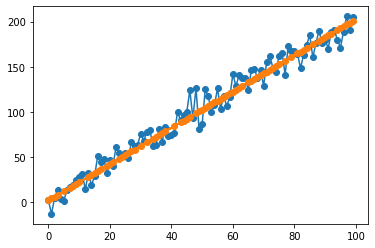

None


In [44]:
plt.close();
//plt.plot(train_x.transposed()[0].reshaped(to: [80]).makeNumpyArray(), train_y.transposed()[0].reshaped(to: [80]).makeNumpyArray(), marker: "o")
plt.plot(X.makeNumpyArray(), y.makeNumpyArray(), marker: "o")
plt.plot(train_x.transposed()[0].reshaped(to: [80]).makeNumpyArray(), preds.makeNumpyArray(), marker: "o")
plt.show();

In [41]:
train_x.transposed()[0]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
 1.0, 1.0]
